we are analyzing data on the literacy rate for each district, and we have already computed descriptive statistics to summarize our data. For the next part of our analysis, we want to find out if the data on district literacy rate fits a specific type of probability distribution. we will use the normal distribution to model our data. We will also compute z-scores to find any outliers in our data.

The Department of Education asks us to collect data on mean district literacy rates for two of the nation’s largest states: STATE21 and STATE28. STATE28 has almost 40 districts, and STATE21 has more than 70. Due to limited time and resources, we are only able to survey 20 randomly chosen districts in each state. The department asks us to determine if the difference between the two mean district literacy rates is statistically significant or due to chance. This will help the department decide how to distribute government funding to improve literacy. If there is a statistically-significant difference, the state with the lower literacy rate may receive more funding.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

In [3]:
education_districtwise = pd.read_csv('C:/Users/0&1/OneDrive/Documents/education_districtwise.csv')
education_districtwise = education_districtwise.dropna()

<Axes: >

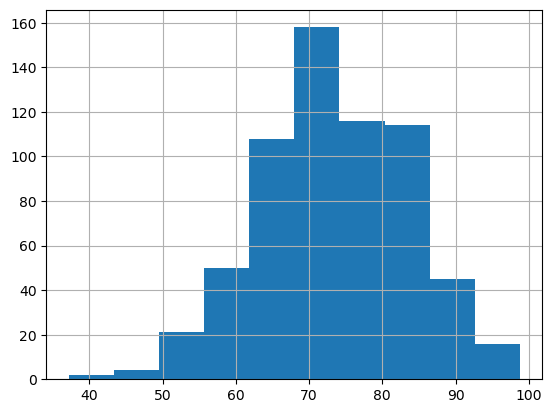

In [4]:
education_districtwise['OVERALL_LI'].hist()

# Empirical rule

we can expect that about:

- 68% of district literacy rates will fall within +/- 1 SD from the mean.
- 95% of district literacy rates will fall within +/- 2 SD from the mean.
- 99.7% of district literacy rates will fall within +/- 3 SD from the mean.

In [5]:
mean_overall_li = education_districtwise['OVERALL_LI'].mean()
mean_overall_li

73.39518927444796

In [6]:
std_overall_li = education_districtwise['OVERALL_LI'].std()
std_overall_li

10.098460413782469

computing the actual percentage of district literacy rates that fall within +/- 1 SD from the mean.

In [7]:
lower_limit = mean_overall_li - 1 * std_overall_li
upper_limit = mean_overall_li + 1 * std_overall_li
((education_districtwise['OVERALL_LI'] >= lower_limit) & (education_districtwise['OVERALL_LI'] <= upper_limit)).mean()

0.6640378548895899

computing the actual percentage of district literacy rates that fall within +/- 2 SD from the mean.

In [8]:
lower_limit = mean_overall_li - 2 * std_overall_li
upper_limit = mean_overall_li + 2 * std_overall_li
((education_districtwise['OVERALL_LI'] >= lower_limit) & (education_districtwise['OVERALL_LI'] <= upper_limit)).mean()

0.9542586750788643

computing the actual percentage of district literacy rates that fall within +/- 3 SD from the mean.

In [9]:
lower_limit = mean_overall_li - 3 * std_overall_li
upper_limit = mean_overall_li + 3 * std_overall_li
((education_districtwise['OVERALL_LI'] >= lower_limit) & (education_districtwise['OVERALL_LI'] <= upper_limit)).mean()

0.9968454258675079

So our data is normally distributed.

# Compute z-scores to find outliers

Observations with a z-score smaller than -3 or larger than +3 as outliers. In other words, these are values that lie more than +/- 3 SDs from the mean.

In [10]:
education_districtwise['Z_SCORE'] = stats.zscore(education_districtwise['OVERALL_LI'])
education_districtwise

,DISTNAME,STATNAME,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,OVERALL_LI,Z_SCORE
0,DISTRICT32,STATE1,13,391,104,875564.0,66.92,-0.641712
1,DISTRICT649,STATE1,18,678,144,1015503.0,66.93,-0.640721
2,DISTRICT229,STATE1,8,94,65,1269751.0,71.21,-0.216559
3,DISTRICT259,STATE1,13,523,104,735753.0,57.98,-1.527694
4,DISTRICT486,STATE1,8,359,64,570060.0,65.00,-0.831990
...,...,...,...,...,...,...,...,...
675,DISTRICT522,STATE29,37,876,137,5296396.0,78.05,0.461307
676,DISTRICT498,STATE29,64,1458,230,4042191.0,56.06,-1.717972
677,DISTRICT343,STATE29,59,1117,216,3483648.0,65.05,-0.827035
678,DISTRICT130,STATE29,51,993,211,3522644.0,66.16,-0.717030


In [11]:
education_districtwise[(education_districtwise['Z_SCORE'] > 3) | (education_districtwise['Z_SCORE'] < -3)]

,DISTNAME,STATNAME,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,OVERALL_LI,Z_SCORE
434,DISTRICT461,STATE31,4,360,53,532791.0,42.67,-3.044964
494,DISTRICT429,STATE22,6,612,62,728677.0,37.22,-3.585076


We can identify two outlying districts that have unusually low literacy rates: DISTRICT461 and DISTRICT429. The literacy rates in these two districts are more than 3 SDs below the overall mean literacy rate.

The government may want to provide more funding and resources to these two districts in the hopes of significantly improving literacy.

# Sampling

In [12]:
education_districtwise = pd.read_csv('C:/Users/0&1/OneDrive/Documents/education_districtwise.csv')
education_districtwise = education_districtwise.dropna()

In [13]:
sampled_data = education_districtwise.sample(n=50, replace=True, random_state=31208)
sampled_data

,DISTNAME,STATNAME,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,OVERALL_LI
661,DISTRICT528,STATE6,9,112,89,1863174.0,92.14
216,DISTRICT291,STATE28,14,1188,165,3273127.0,52.49
367,DISTRICT66,STATE23,12,1169,116,1042304.0,62.14
254,DISTRICT458,STATE3,3,157,19,82839.0,76.33
286,DISTRICT636,STATE35,3,187,44,514683.0,86.70
369,DISTRICT512,STATE23,6,589,30,717169.0,68.35
258,DISTRICT156,STATE3,6,80,9,35289.0,59.94
10,DISTRICT412,STATE1,11,187,95,476820.0,68.69
512,DISTRICT277,STATE9,10,558,179,2298934.0,84.31
144,DISTRICT133,STATE21,14,1672,136,3673849.0,69.61


# Compute the mean of a sampling distribution with 10000 samples:

In [14]:
estimate_list = []
for i in range(10000):
    estimate_list.append(education_districtwise['OVERALL_LI'].sample(n=50, replace=True).mean())
estimate_df = pd.DataFrame(data={'estimate': estimate_list})

In [15]:
mean_sample_means = estimate_df['estimate'].mean()
mean_sample_means

73.4123517

In [16]:
population_mean = education_districtwise['OVERALL_LI'].mean()
population_mean

73.39518927444796

NameError: name 'estimate1' is not defined

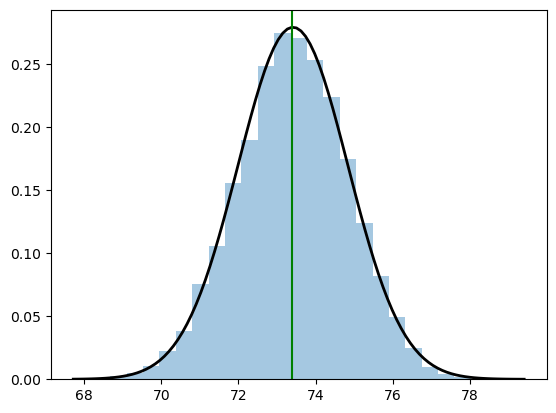

In [18]:
plt.hist(estimate_df['estimate'], bins=25, density=True, alpha=0.4, label = "histogram of sample means of 10000 random samples")
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100) # generate a grid of 100 values from xmin to xmax.
p = stats.norm.pdf(x, mean_sample_means, stats.tstd(estimate_df['estimate']))
plt.plot(x, p,'k', linewidth=2, label = 'normal curve from central limit theorem')
plt.axvline(x=population_mean, color='g', linestyle = 'solid', label = 'population mean')
plt.axvline(x=estimate1, color='r', linestyle = '--', label = 'sample mean of the first random sample')
plt.axvline(x=mean_sample_means, color='b', linestyle = ':', label = 'mean of sample means of 10000 random samples')
plt.title("Sampling distribution of sample mean")
plt.xlabel('sample mean')
plt.ylabel('density')
plt.legend(bbox_to_anchor=(1.04,1))
plt.show()

- As the central limit theorem predicts, the histogram of the sampling distribution is well approximated by the normal distribution. The outline of the histogram closely follows the normal curve.
- The mean of the sampling distribution, the blue dotted line, overlaps with the population mean, the green solid line. This shows that the two means are essentially equal to each other.
- The sample mean of our first estimate of 50 districts, the red dashed line, is farther away from the center. This is due to sampling variability.

# Construct a 95% confidence interval

In [19]:
sample_mean = sampled_data['OVERALL_LI'].mean()

In [20]:
estimated_standard_error = sampled_data['OVERALL_LI'].std() / np.sqrt(sampled_data.shape[0])

In [22]:
stats.norm.interval(confidence=0.95, loc=sample_mean, scale=estimated_standard_error)

(71.42241096968617, 77.02478903031381)

95% CI: (71.42, 77.02)

# Construct a 99% confidence interval

In [23]:
stats.norm.interval(confidence=0.99, loc=sample_mean, scale=estimated_standard_error)

(70.54221358373107, 77.90498641626891)

99% CI: (70.54, 77.90)

- With a confidence level of 95%, the interval covers 5.6 percentage points (71.4% - 77.0%)
- With a confidence level of 99%, the interval covers 7.4 percentage points (70.5% - 77.9%)

In [24]:
state21 = education_districtwise[education_districtwise['STATNAME'] == "STATE21"]

In [25]:
state28 = education_districtwise[education_districtwise['STATNAME'] == "STATE28"]

In [26]:
sampled_state21 = state21.sample(n=20, replace = True, random_state=13490)

In [27]:
sampled_state28 = state28.sample(n=20, replace = True, random_state=39103)

In [28]:
sampled_state21['OVERALL_LI'].mean()

70.82900000000001

In [29]:
sampled_state28['OVERALL_LI'].mean()

64.60100000000001

The observed difference between the mean district literacy rates of STATE21 and STATE28 is 6.2 percentage points

# Hypothesis

𝐻0 : There is no difference in the mean district literacy rates between STATE21 and STATE28.

𝐻𝐴 : There is a difference in the mean district literacy rates between STATE21 and STATE28.

In [30]:
stats.ttest_ind(a=sampled_state21['OVERALL_LI'], b=sampled_state28['OVERALL_LI'], equal_var=False)

TtestResult(statistic=2.8980444277268735, pvalue=0.0064217191427652365, df=35.20796133045557)

Our p-value of 0.0064, or 0.64%, is less than the significance level of 0.05, or 5%. Therefore, we will reject the null hypothesis and conclude that there is a statistically significant difference between the mean district literacy rates of the two states: STATE21 and STATE28.

Since there is a statistically significant difference in mean district literacy rates, the state with the lower literacy rate, STATE28, will likely receive more resources to improve literacy.